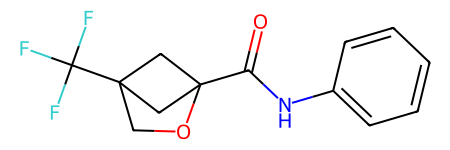

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

# Test in a kinase inhibitor
mol = Chem.MolFromSmiles("FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1")
# Default
mol



In [12]:
from rdkit import Chem
from rdkit.Chem import rdForceFieldHelpers
from rdkit.Chem import AllChem, Descriptors
import py3Dmol
import numpy as np
 
def find_conf_with_min_energy(mol):
    optimization_result = rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(mol)
   
    min_energy, min_energy_conf_index = pow(10,5), None
    for index, (status, energy) in enumerate(optimization_result):
        if energy < min_energy and status == 0:
            min_energy_conf_index = index
            min_energy = min(min_energy, energy)
    print(min_energy)
    return min_energy_conf_index, min_energy, mol
 
mol = Chem.MolFromSmiles('FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1')
 
# mol = Chem.MolFromSmiles('FC(F)(C1(NC2)CC2C1)F')
mol = Chem.AddHs(mol)
rdForceFieldHelpers.MMFFSanitizeMolecule(mol)
 
num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)
amount_of_confs = pow(3, num_rotatable_bonds + 3)
AllChem.EmbedMultipleConfs(mol, numConfs=amount_of_confs, randomSeed=3407)
# for atom in mol.GetAtoms():
#     atom.SetAtomMapNum(atom.GetIdx())
 
ri = mol.GetRingInfo()
print(ri.AtomRings())
 
min_energy_conf_index, min_energy, mol = find_conf_with_min_energy(mol)
 
X1, R1, X2, R2 = 1, 0, 5, 15
conf = mol.GetConformer(min_energy_conf_index)

view = py3Dmol.view(width=600, height=600)
pdb = Chem.MolToPDBBlock(mol, confId=min_energy_conf_index)
open("test.pdb",'w').write(pdb)
view.addModel(pdb, 'pdb')
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

((5, 6, 7, 4), (8, 6, 5, 4, 9), (14, 15, 16, 17, 18, 13), (8, 6, 7, 4, 9))
32.936020003068634


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [3]:
!pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
